<span style="font-size: 15px;">
 ----------------------------------------------------------------- <br>
 Project: House Prices Prediction <br>
 Author: Jairo Macedo <br>
 Created: June 2024 <br>
 Last Modified: [04, 2025] | By: Jairo Macedo <br>
 ----------------------------------------------------------------- <br>
 Description: <br>
 This Python notebook contains the code and analysis for the project <br>
 "House Prices Prediction". The goal is to model and predict house prices <br>
 using a variety of property features. The dataset comes from a Kaggle <br>
 competition and includes rich details about homes and their sale prices. <br>
 ----------------------------------------------------------------- <br>
 The analysis is structured as follows: <br>
 1. Data Import and Exploration: Loading and understanding the dataset. <br>
 2. Feature Engineering: Creating and selecting relevant variables. <br>
 3. Modeling: Applying and tuning machine learning models to predict prices. <br>
 4. Evaluation: Assessing model performance and accuracy. <br>
 5. Submission: Preparing results for Kaggle submission. <br>
 ----------------------------------------------------------------- <br>

<br>
<b>Clean Dataset Files</b> <br>
- <code>train_2.csv</code> – The cleaned and preprocessed training set <br>
- <code>test_2.csv</code> – The cleaned and preprocessed test set <br>
</span>



# Packages ⚙️ and data 🗂️

In [11]:
# ================================
# Data Handling and Utilities
# ================================
import pandas as pd            # Data manipulation
import numpy as np             # Numerical operations

import matplotlib.pyplot as plt # Visualization and diagnostic plots

import zipfile                 # Reading compressed .zip files
from support import zip_path   # Path to the .zip file
from support import results_path  # Importing the path for saving results

import matplotlib.pyplot as plt
import seaborn as sns

# ================================
# Machine Learning Models
# ================================
from sklearn.model_selection import train_test_split   # Splitting dataset into training and testing sets
from sklearn.linear_model import LinearRegression      # Ordinary Least Squares (baseline model)
from sklearn import tree                               # Decision Tree Regressor (non-parametric model)
from sklearn.neighbors import KNeighborsRegressor      # K-Nearest Neighbors Regressor (non-parametric model)

# ================================
# Model Evaluation Metrics
# ================================
from sklearn.metrics import mean_absolute_error        # Mean Absolute Error (MAE)
from sklearn.metrics import mean_squared_error         # Mean Squared Error (MSE and RMSE)
from sklearn.metrics import r2_score                   # R-squared (goodness-of-fit)

In [2]:
# Setting the global random seed for reproducibility
np.random.seed(42)

In [12]:
df_train = pd.read_csv(r"C:\Users\USER\OneDrive\Github\HousePrices\Data\train_2.csv")
df_test = pd.read_csv(r"C:\Users\USER\OneDrive\Github\HousePrices\Data\test_2.csv")

# Model 🛠️

## Sets

In [19]:
cols_nr = df_train.columns[df_train.dtypes != 'object']
cols_nr[cols_nr != 'SalePrice']

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [20]:
df_train = df_train.loc[:,cols_nr]
df_train.shape

(1460, 38)

In [21]:
df_test = df_test.loc[:,cols_nr[cols_nr != 'SalePrice']]
df_test.shape

(1459, 37)

In [22]:
# Explanatory variables (X) and the outcome variable (y)
X = df_train.drop('SalePrice', axis=1)  # Explanatory variables (covariates)
y = df_train['SalePrice']               # Outcome variable of interest

In [23]:
# Dividing the sample into estimation and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42  # 33% of the sample is set aside for out-of-sample evaluation
)

## Linear Regression

In [24]:
# Estimating the baseline linear regression model using the training sample
reg_lr = LinearRegression().fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Generating out-of-sample predictions using the test set
y_pred_lr = reg_lr.predict(X_test)

## Decision tree methods

In [ ]:
# Estimating a decision tree regression model using the training sample
reg_tm = tree.DecisionTreeRegressor().fit(X_train, y_train)

In [ ]:
# Generating out-of-sample predictions from the decision tree model
y_pred_tm = reg_tm.predict(X_test)

## K-Nearest Neighbors Regression

In [ ]:
# Estimating the K-Nearest Neighbors regression model (k=2) using the training sample
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [ ]:
# Generating out-of-sample predictions from the KNN regression model
y_pred_knn = reg_knn.predict(X_test)

## Comparing models

In [ ]:
# ========================================
# Evaluating Model Performance
# ========================================

# --- Linear Regression ---
mae_rl = mean_absolute_error(y_test, y_pred_lr)
rmse_rl = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("Linear Regression:")
print("MAE :", mae_rl)
print("RMSE:", rmse_rl)
print()

# --- Decision Tree ---
mae_ad = mean_absolute_error(y_test, y_pred_tm)
rmse_ad = np.sqrt(mean_squared_error(y_test, y_pred_tm))
print("Decision Tree:")
print("MAE :", mae_ad)
print("RMSE:", rmse_ad)
print()

# --- K-Nearest Neighbors (KNN) ---
mae_knn = mean_absolute_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print("K-Nearest Neighbors (k=2):")
print("MAE :", mae_knn)
print("RMSE:", rmse_knn)
print()


Linear Regression:
MAE : 23908.330991697116
RMSE: 39319.49414258045

Decision Tree:
MAE : 28025.585062240665
RMSE: 51421.96184212487

K-Nearest Neighbors (k=2):
MAE : 33247.14937759336
RMSE: 52277.76847253373



In [ ]:
# ========================================
# Model Comparison Summary
# ========================================
print("Best model based on RMSE:")

min_rmse = min(rmse_rl, rmse_ad, rmse_knn)

if min_rmse == rmse_rl:
    print("→ Linear Regression had the lowest RMSE.")
elif min_rmse == rmse_ad:
    print("→ Decision Tree had the lowest RMSE.")
else:
    print("→ K-Nearest Neighbors (k=2) had the lowest RMSE.")

Best model based on RMSE:
→ Linear Regression had the lowest RMSE.


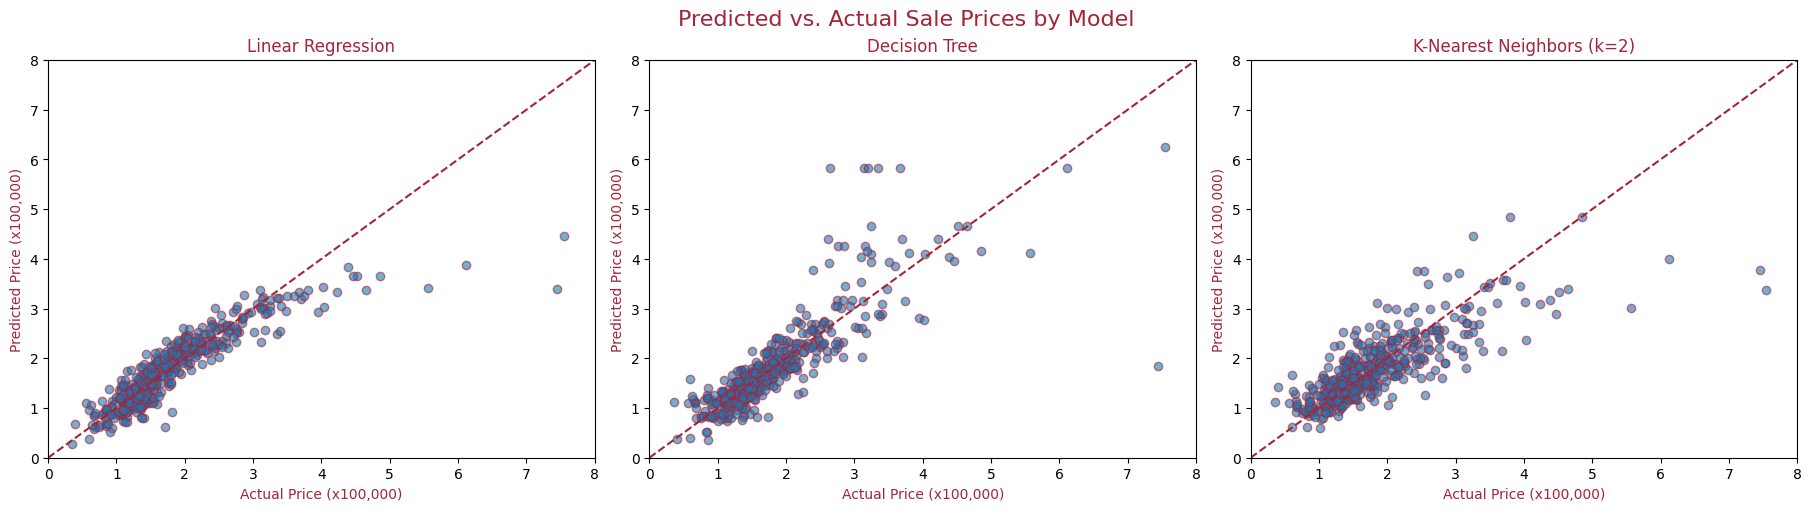

In [ ]:
# ================================================
# Visualizing Predicted vs. Actual Values (with color)
# ================================================

# Custom color (dark wine red)
rgb_color = (162 / 255, 37 / 255, 56 / 255)

fig, ax = plt.subplots(ncols=3, figsize=(18, 5), constrained_layout=True)

# Scaling target values for better axis readability (in 100,000s)
scaling = 100000
x_range = [0, 8]  # Range for both axes (scaled)

# --- Linear Regression ---
ax[0].scatter(y_test / scaling, y_pred_lr / scaling, alpha=0.6, edgecolor=rgb_color)
ax[0].plot(x_range, x_range, '--', color=rgb_color)  # Reference line (y = x)
ax[0].set_title('Linear Regression', color=rgb_color)
ax[0].set_xlabel('Actual Price (x100,000)', color=rgb_color)
ax[0].set_ylabel('Predicted Price (x100,000)', color=rgb_color)
ax[0].set_xlim(x_range)
ax[0].set_ylim(x_range)

# --- Decision Tree ---
ax[1].scatter(y_test / scaling, y_pred_tm / scaling, alpha=0.6, edgecolor=rgb_color)
ax[1].plot(x_range, x_range, '--', color=rgb_color)
ax[1].set_title('Decision Tree', color=rgb_color)
ax[1].set_xlabel('Actual Price (x100,000)', color=rgb_color)
ax[1].set_ylabel('Predicted Price (x100,000)', color=rgb_color)
ax[1].set_xlim(x_range)
ax[1].set_ylim(x_range)

# --- KNN ---
ax[2].scatter(y_test / scaling, y_pred_knn / scaling, alpha=0.6, edgecolor=rgb_color)
ax[2].plot(x_range, x_range, '--', color=rgb_color)
ax[2].set_title('K-Nearest Neighbors (k=2)', color=rgb_color)
ax[2].set_xlabel('Actual Price (x100,000)', color=rgb_color)
ax[2].set_ylabel('Predicted Price (x100,000)', color=rgb_color)
ax[2].set_xlim(x_range)
ax[2].set_ylim(x_range)

# Add a unified title with color
plt.suptitle('Predicted vs. Actual Sale Prices by Model', fontsize=16, color=rgb_color)
plt.show()

We will proceed with **Linear Regression** as our preferred model.  
Among the models tested — Linear Regression, Decision Tree, and K-Nearest Neighbors —  
**Linear Regression yielded the lowest Root Mean Squared Error (RMSE)**, which is also the evaluation metric used by **Kaggle** for ranking submissions in this competition.

This choice reflects both **predictive performance** and **alignment with the competition's scoring criteria**.

# Deploy 🔮

In [ ]:
# Using the Linear Regression model to generate predictions on the test set
y_pred = reg_lr.predict(df_test)

In [ ]:
# Adding the prediction column to the test dataset
df_test['SalePrice'] = y_pred

In [ ]:
# Extracting only the Id and predicted SalePrice columns for submission
data = df_test[['Id', 'SalePrice']]
data.head(3)

,Id,SalePrice
0,1461,121257.411636
1,1462,133303.582683
2,1463,169238.928852


In [ ]:
# Exporting the submission file to CSV using f-string
data.to_csv(f'{results_path}/result1.csv', index=False)

In [ ]:
# Clears all plots and outputs
from IPython.display import clear_output